In [1]:
pip install yfinance


In [1]:
# For data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
# To fetch financial data
import yfinance as yf

import matplotlib.pyplot as plt    
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#DateTime
from datetime import datetime, date, timedelta


In [2]:

btc = yf.Ticker("BTC-USD")
btc_df = btc.history(period="10y")
btc_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [3]:
btc_df_clone=btc_df.copy()


In [59]:
btc_df=btc_df_clone.copy()

In [4]:
btc_df=btc_df[["Open","High","Low","Close"]]

btc_df["H_L"]=btc_df["High"]-btc_df["Low"]
btc_df["O_C"]=btc_df["Open"]-btc_df["Close"]

# MA 7 DAYS
btc_df["SMA7"]=btc_df["Close"].rolling(7).mean()

# MA 7 DAYS
btc_df["SMA14"]=btc_df["Close"].rolling(14).mean()
btc_df["SMA21"]=btc_df["Close"].rolling(21).mean()

#STD 7
btc_df["STD7"]=btc_df["Close"].rolling(7).std()

# drop unnecessary column
btc_df.drop(["Open","High","Low"],axis=1,inplace=True)

# drop na
btc_df.dropna(inplace=True)

# convert datetime index column to date 
btc_df.index = btc_df.index.date

# add target column
btc_df["target"]=btc_df["Close"].shift(-1)




btc_df.head(10)

,Close,H_L,O_C,SMA7,SMA14,SMA21,STD7,target
2014-10-07,336.187012,18.765015,-5.602997,347.691572,372.296927,387.352142,24.885399,352.940002
2014-10-08,352.940002,27.176025,-16.824005,343.309431,367.278000,382.380999,19.656765,365.026001
2014-10-09,365.026001,35.039001,-12.278015,341.874289,363.953142,379.551761,17.159362,361.562012
2014-10-10,361.562012,22.103973,3.125000,342.167149,360.891501,377.969190,17.524172,362.299011
2014-10-11,362.299011,11.240021,-0.937012,346.943294,358.232860,375.749906,17.847829,378.549011
2014-10-12,378.549011,23.289001,-15.943024,355.234580,358.330575,374.784572,16.981632,390.414001
2014-10-13,390.414001,28.329010,-12.493011,363.853864,359.398217,374.225619,17.392524,400.869995
2014-10-14,400.869995,20.373993,-9.178009,373.094291,360.392931,372.562715,17.426227,394.773010
2014-10-15,394.773010,13.460999,6.181976,379.070435,361.189933,371.208811,16.511671,382.556000
2014-10-16,382.556000,25.737000,11.962006,381.574720,361.724505,369.827002,15.312384,383.757996


In [5]:
last_day=btc_df.iloc[-1,:]
print(last_day)
btc_df.dropna(inplace=True)

Close     26641.250000
H_L         313.236328
O_C        -276.164062
SMA7      26417.926060
SMA14     26592.977400
SMA21     26366.630394
STD7        176.454042
target             NaN
Name: 2023-09-28, dtype: float64


In [6]:
# plot the "Close" column using Plotly Express
fig = px.line(btc_df, x=btc_df.index, y=['Close', 'SMA14', 'SMA21', 'STD7'], title='Close Prices with SMA14, SMA21, and STD7')
fig.show()

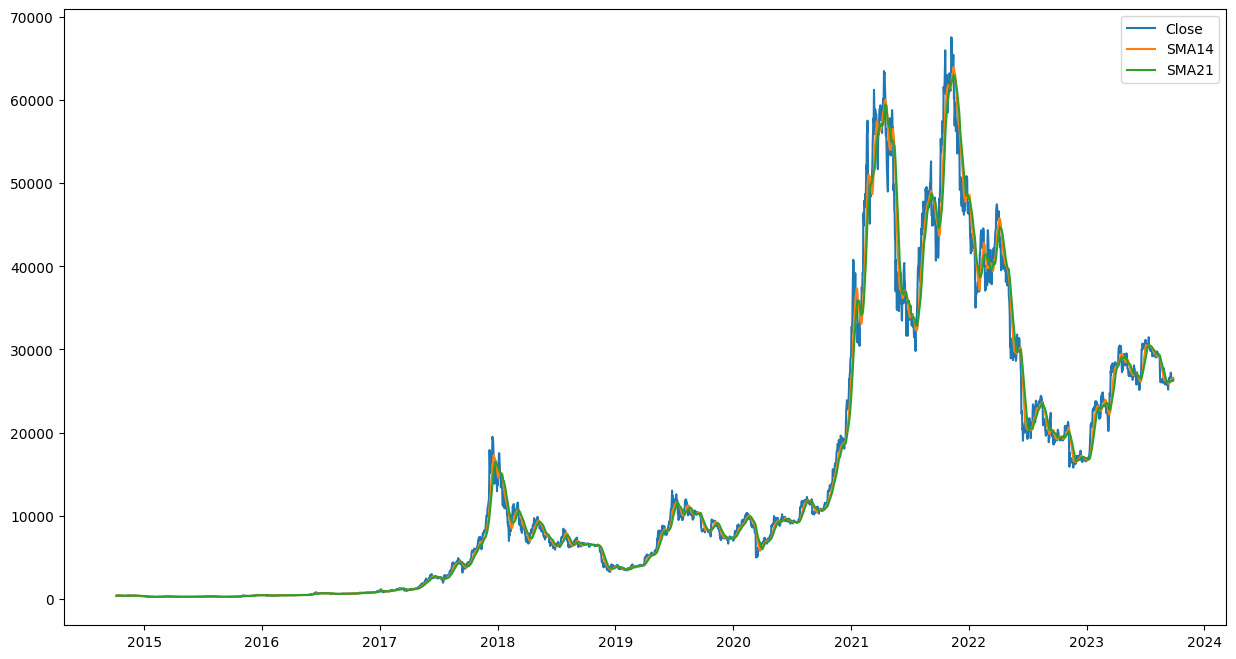

In [7]:
plt.figure(figsize=(15,8))
plt.plot(btc_df["Close"],label="Close")
plt.plot(btc_df["SMA14"],label="SMA14")
plt.plot(btc_df["SMA21"],label="SMA21")

plt.legend()
plt.show()



<AxesSubplot:>

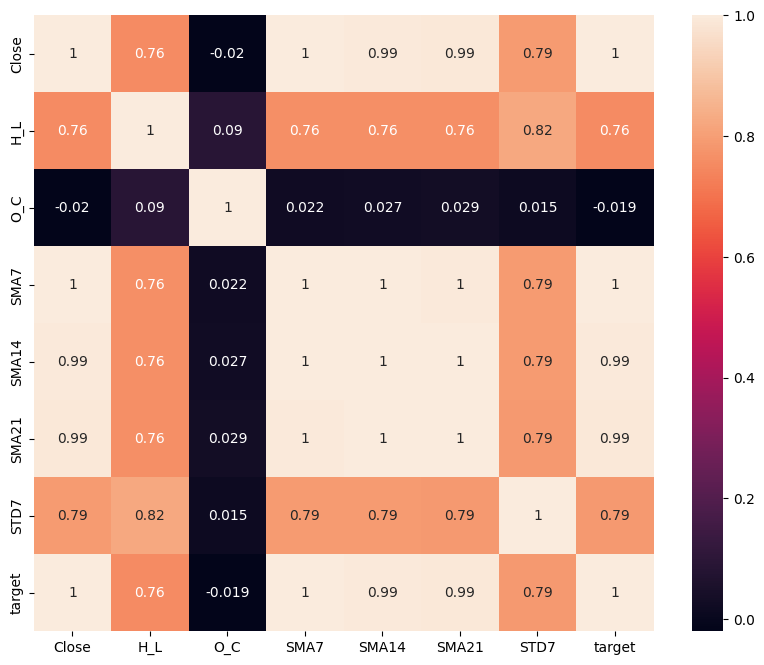

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(btc_df.corr(),annot=True)

In [9]:
# Split data into training and testing sets
train_size = int(len(btc_df) * 0.8)
test_size = len(btc_df) - train_size
print(train_size,test_size)
x=btc_df.iloc[:,:-1].values
y=btc_df.iloc[:,-1].values
# train_data, test_data = btc_df[0:train_size,:], btc_df[train_size:len(btc_df),:]

2622 656


In [10]:
x_train,y_train=x[:train_size],y[:train_size]
x_test,y_test=x[train_size:],y[train_size:]

In [11]:
# Creating a Linear Regression model and fitting it to the training data
lr = LinearRegression()
lr.fit(x_train, y_train)


print(f"{lr.score(x_test,y_test):.2f}")

0.99


In [12]:
y_pred=lr.predict(x_test)

In [13]:
# میانگین قدر مطلق خطاها 
print("MAE: ",mean_absolute_error(y_test,y_pred))
# درصد میانگین قدر مطلق خطاها 
print("MAPE: ",mean_absolute_percentage_error(y_test,y_pred)*100)


print("MSE: ",mean_squared_error(y_test,y_pred))
# RMSE
print("RMSE: ",mean_squared_error(y_test,y_pred)**0.5)

print("R2: ",r2_score(y_test,y_pred))

MAE:  558.3690412536538
MAPE:  1.9548797605691886
MSE:  776327.6617214853
RMSE:  881.0945815980741
R2:  0.9897840894459574


In [14]:
print(last_day)
last_day_1=np.array([[26806.767578,123.134766,-32.052734,26445.610212,26120.635603,26195.073103,319.075817]])

lr.predict(last_day_1)

Close     26641.250000
H_L         313.236328
O_C        -276.164062
SMA7      26417.926060
SMA14     26592.977400
SMA21     26366.630394
STD7        176.454042
target             NaN
Name: 2023-09-28, dtype: float64


array([26778.7638263])